<a href="https://colab.research.google.com/github/ogabrielpaes/challenge-data-science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
# Cálculo do faturamento total por loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados do faturamento de cada loja
print("Faturamento Loja 1:", faturamento_loja1)
print("Faturamento Loja 2:", faturamento_loja2)
print("Faturamento Loja 3:", faturamento_loja3)
print("Faturamento Loja 4:", faturamento_loja4)


Faturamento Loja 1: 1534509.12
Faturamento Loja 2: 1488459.06
Faturamento Loja 3: 1464025.03
Faturamento Loja 4: 1384497.58


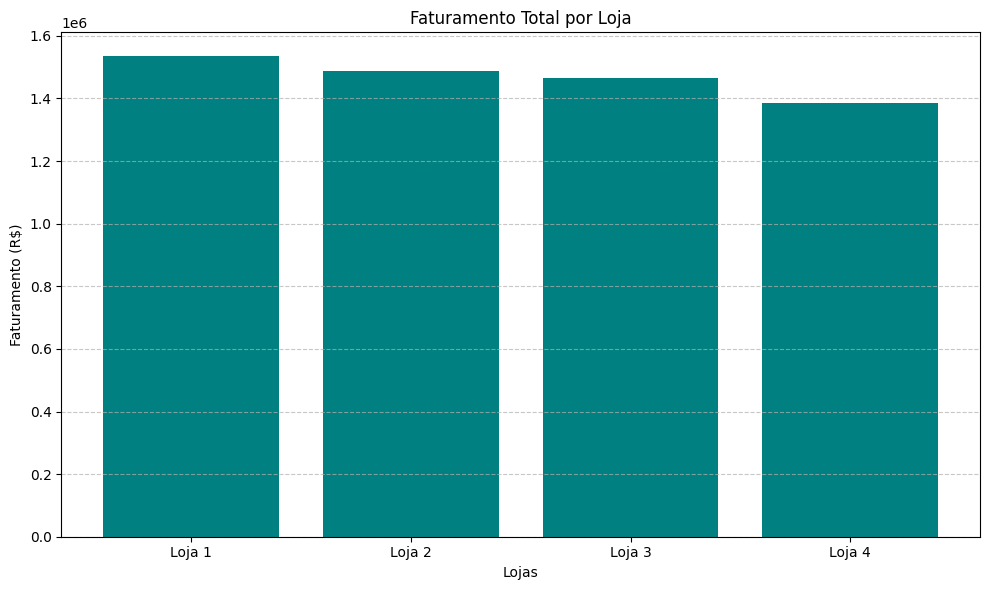

In [5]:
# Dados para o gráfico
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color='teal')
plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [6]:
# Contando as vendas por categoria em cada loja
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts()

# Exibindo os resultados
print("Loja 1:\n", vendas_categoria_loja1)
print("\nLoja 2:\n", vendas_categoria_loja2)
print("\nLoja 3:\n", vendas_categoria_loja3)
print("\nLoja 4:\n", vendas_categoria_loja4)


Loja 1:
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2:
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3:
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4:
 Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer 

In [15]:
print(loja.columns)


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


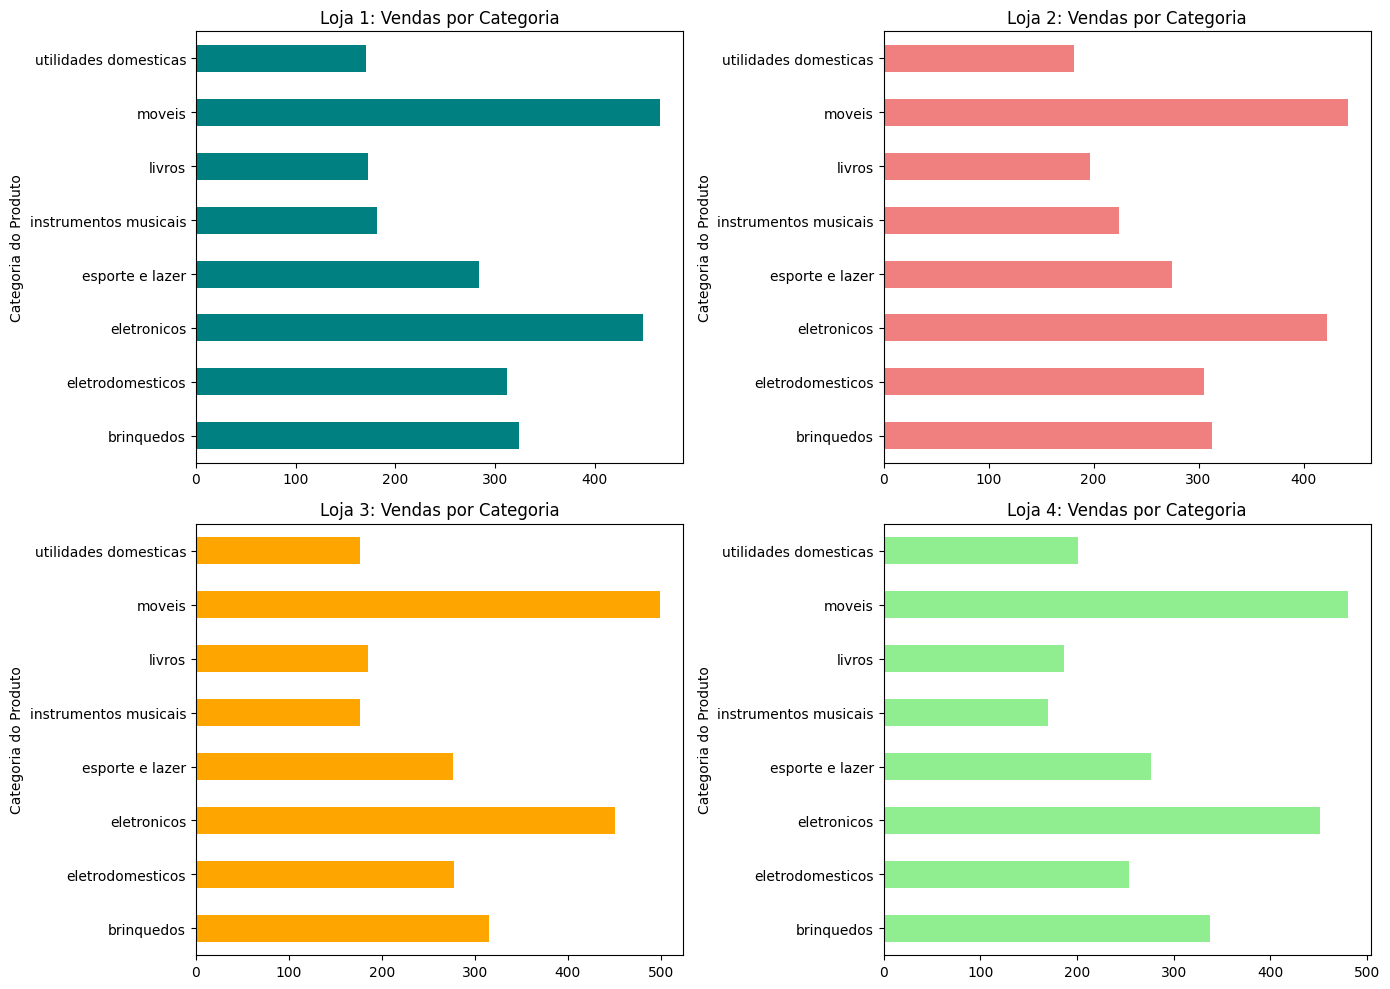

In [17]:
# Agrupando por categoria e contando a quantidade de produtos vendidos para cada loja
categoria_loja1 = loja.groupby('Categoria do Produto')['Produto'].count()
categoria_loja2 = loja2.groupby('Categoria do Produto')['Produto'].count()
categoria_loja3 = loja3.groupby('Categoria do Produto')['Produto'].count()
categoria_loja4 = loja4.groupby('Categoria do Produto')['Produto'].count()

# Criando o gráfico de barras horizontais para todas as lojas
fig, ax = plt.subplots(2, 2, figsize=(14,10))

# Gráficos por loja
categoria_loja1.plot(kind='barh', ax=ax[0, 0], color='teal', title='Loja 1: Vendas por Categoria')
categoria_loja2.plot(kind='barh', ax=ax[0, 1], color='lightcoral', title='Loja 2: Vendas por Categoria')
categoria_loja3.plot(kind='barh', ax=ax[1, 0], color='orange', title='Loja 3: Vendas por Categoria')
categoria_loja4.plot(kind='barh', ax=ax[1, 1], color='lightgreen', title='Loja 4: Vendas por Categoria')

# Ajuste de layout
plt.tight_layout()
plt.show()



# 3. Média de Avaliação das Lojas

In [18]:
# Calcular a média das avaliações para cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Exibir as médias das avaliações
print("Média de Avaliação Loja 1:", media_avaliacao_loja1)
print("Média de Avaliação Loja 2:", media_avaliacao_loja2)
print("Média de Avaliação Loja 3:", media_avaliacao_loja3)
print("Média de Avaliação Loja 4:", media_avaliacao_loja4)


Média de Avaliação Loja 1: 3.976685036032217
Média de Avaliação Loja 2: 4.037303942348453
Média de Avaliação Loja 3: 4.048325561678677
Média de Avaliação Loja 4: 3.9957591178965224


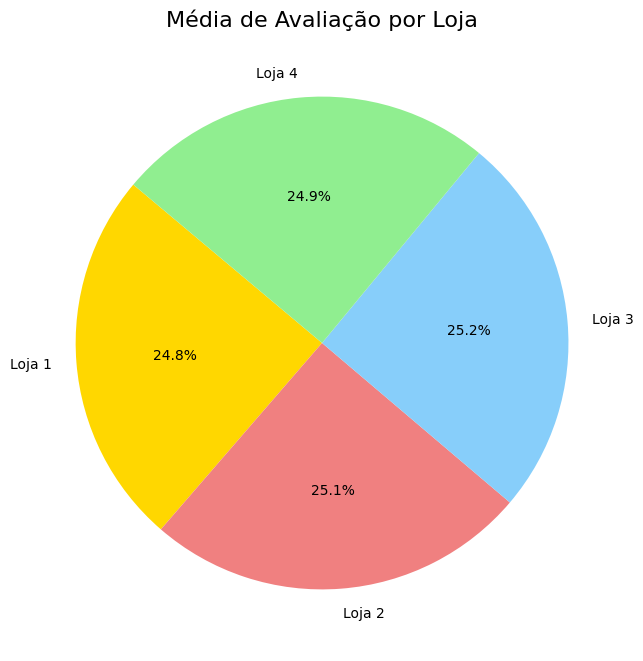

In [22]:
# Dados para o gráfico de pizza
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
media_avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

# Criando o gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(media_avaliacoes, labels=lojas, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])

# Adicionando título
plt.title('Média de Avaliação por Loja', fontsize=16)

# Exibindo o gráfico
plt.show()



# 4. Produtos Mais e Menos Vendidos

In [26]:
# Etapa 1: Calcular os Produtos Mais e Menos Vendidos por Loja

# Agrupar os dados pelo nome do produto e somar as quantidades
produto_vendido_loja1 = loja.groupby('Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)
produto_vendido_loja2 = loja2.groupby('Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)
produto_vendido_loja3 = loja3.groupby('Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)
produto_vendido_loja4 = loja4.groupby('Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)

# Exibindo os top 10 produtos mais vendidos de cada loja
top_produtos_loja1 = produto_vendido_loja1.head(10)
top_produtos_loja2 = produto_vendido_loja2.head(10)
top_produtos_loja3 = produto_vendido_loja3.head(10)
top_produtos_loja4 = produto_vendido_loja4.head(10)

# Exibindo os 10 produtos menos vendidos de cada loja
menos_vendidos_loja1 = produto_vendido_loja1.tail(10)
menos_vendidos_loja2 = produto_vendido_loja2.tail(10)
menos_vendidos_loja3 = produto_vendido_loja3.tail(10)
menos_vendidos_loja4 = produto_vendido_loja4.tail(10)

# Exibindo os resultados
print("Produtos Mais Vendidos - Loja 1")
print(top_produtos_loja1)
print("\nProdutos Menos Vendidos - Loja 1")
print(menos_vendidos_loja1)

print("\nProdutos Mais Vendidos - Loja 2")
print(top_produtos_loja2)
print("\nProdutos Menos Vendidos - Loja 2")
print(menos_vendidos_loja2)

print("\nProdutos Mais Vendidos - Loja 3")
print(top_produtos_loja3)
print("\nProdutos Menos Vendidos - Loja 3")
print(menos_vendidos_loja3)

print("\nProdutos Mais Vendidos - Loja 4")
print(top_produtos_loja4)
print("\nProdutos Menos Vendidos - Loja 4")
print(menos_vendidos_loja4)


Produtos Mais Vendidos - Loja 1
Produto
Secadora de roupas       214
TV Led UHD 4K            196
Cômoda                   188
Impressora               182
Bicicleta                178
Guitarra                 167
Bola de basquete         167
Sofá retrátil            163
Cadeira de escritório    161
Blocos de montar         161
Name: Quantidade de parcelas, dtype: int64

Produtos Menos Vendidos - Loja 1
Produto
Iniciando em programação    113
Panela de pressão           108
Headset                     103
Jogo de copos               101
Cubo mágico 8x8             101
Corda de pular              100
Tablet ABXY                  99
Dinossauro Rex               94
Mochila                      90
Celular ABXY                 78
Name: Quantidade de parcelas, dtype: int64

Produtos Mais Vendidos - Loja 2
Produto
Iniciando em programação    223
Celular Plus X42            195
Violão                      183
Micro-ondas                 179
Secadora de roupas          177
Pandeiro             

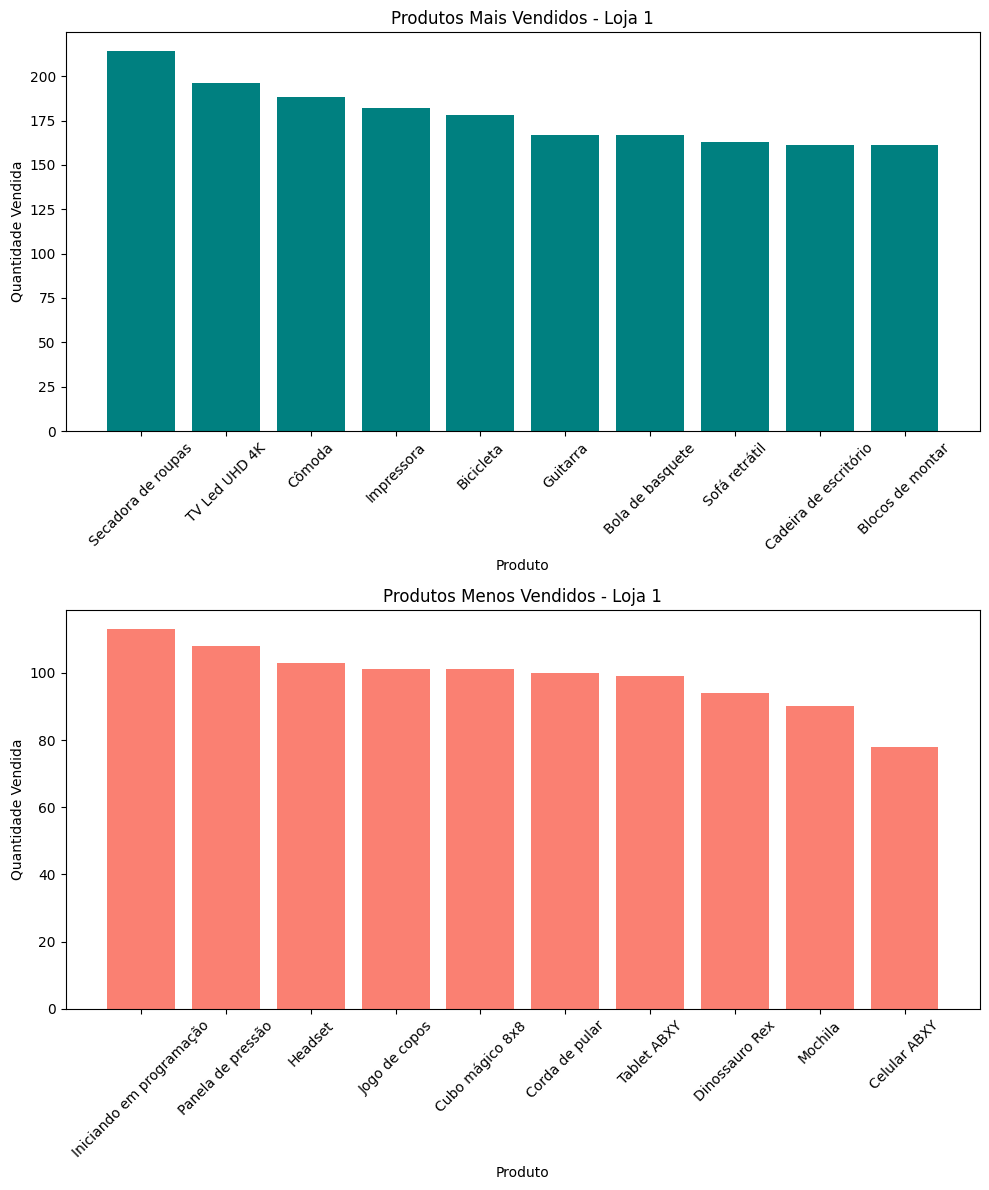

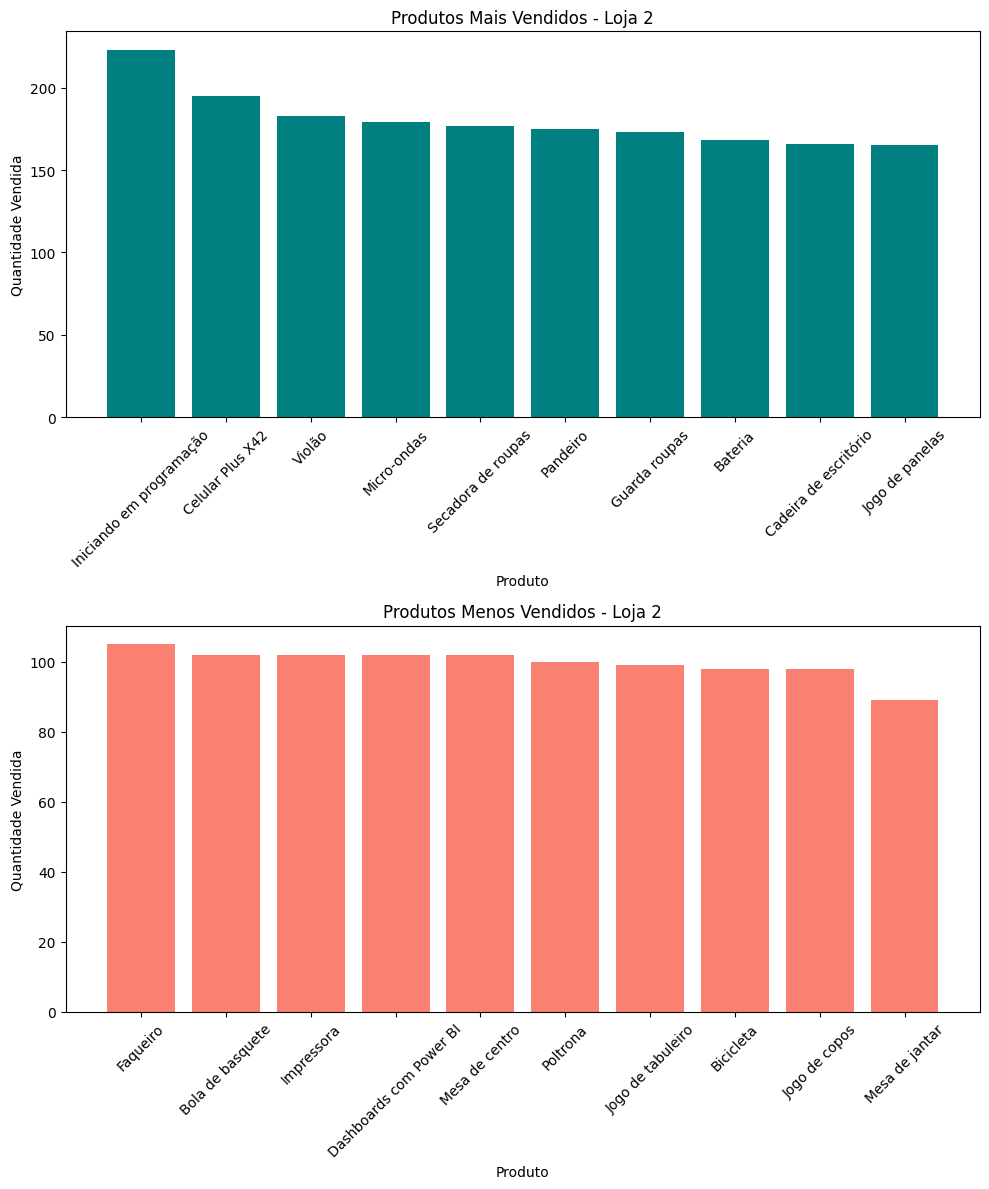

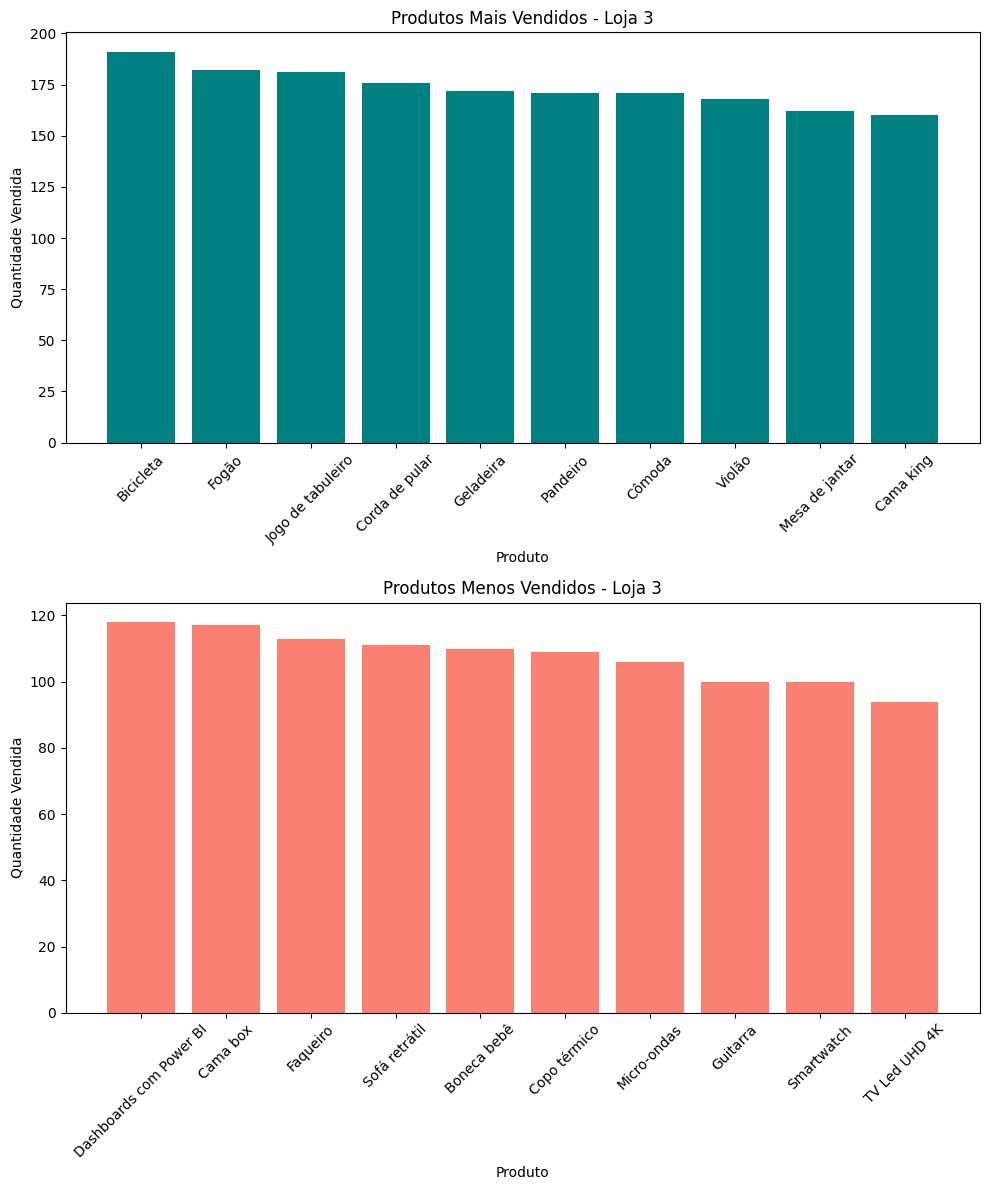

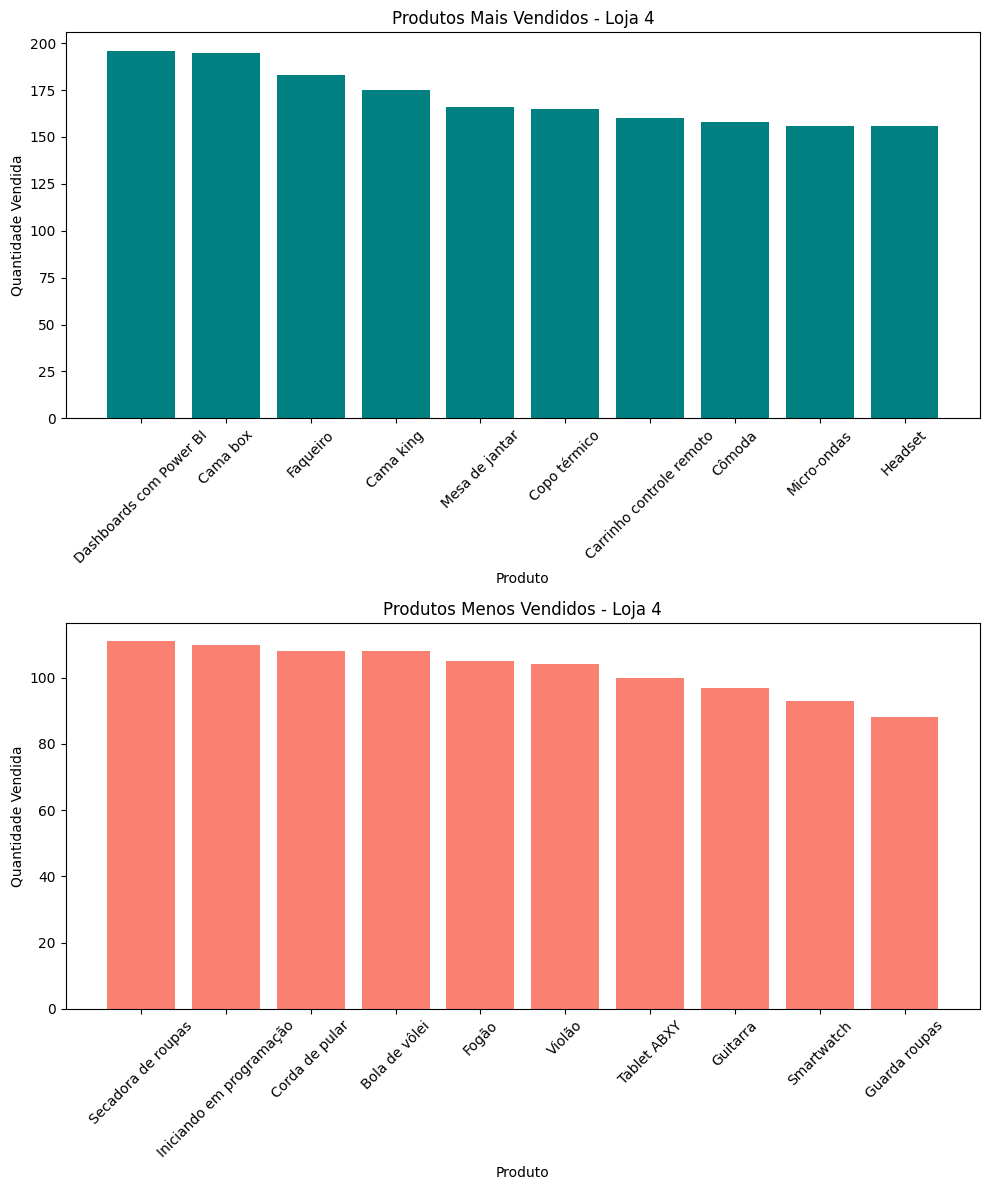

In [27]:
import matplotlib.pyplot as plt

# Função para gerar gráfico de barras para os produtos mais e menos vendidos
def plot_produtos_vendidos(top_produtos, menos_vendidos, loja_numero):
    fig, ax = plt.subplots(2, 1, figsize=(10, 12))  # Dois gráficos em um

    # Gráfico de Produtos Mais Vendidos
    ax[0].bar(top_produtos.index, top_produtos.values, color='teal')
    ax[0].set_title(f'Produtos Mais Vendidos - Loja {loja_numero}')
    ax[0].set_xlabel('Produto')
    ax[0].set_ylabel('Quantidade Vendida')
    ax[0].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos no eixo x

    # Gráfico de Produtos Menos Vendidos
    ax[1].bar(menos_vendidos.index, menos_vendidos.values, color='salmon')
    ax[1].set_title(f'Produtos Menos Vendidos - Loja {loja_numero}')
    ax[1].set_xlabel('Produto')
    ax[1].set_ylabel('Quantidade Vendida')
    ax[1].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos no eixo x

    # Ajuste no layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

# Gerar gráficos para cada loja
plot_produtos_vendidos(top_produtos_loja1, menos_vendidos_loja1, 1)
plot_produtos_vendidos(top_produtos_loja2, menos_vendidos_loja2, 2)
plot_produtos_vendidos(top_produtos_loja3, menos_vendidos_loja3, 3)
plot_produtos_vendidos(top_produtos_loja4, menos_vendidos_loja4, 4)


# 5. Frete Médio por Loja


In [28]:
# Calcular o custo médio de frete para cada loja
media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

# Exibindo os resultados
print("Custo médio de frete Loja 1:", media_frete_loja1)
print("Custo médio de frete Loja 2:", media_frete_loja2)
print("Custo médio de frete Loja 3:", media_frete_loja3)
print("Custo médio de frete Loja 4:", media_frete_loja4)


Custo médio de frete Loja 1: 34.69180491551149
Custo médio de frete Loja 2: 33.62194065817927
Custo médio de frete Loja 3: 33.07446427411743
Custo médio de frete Loja 4: 31.278997081841727


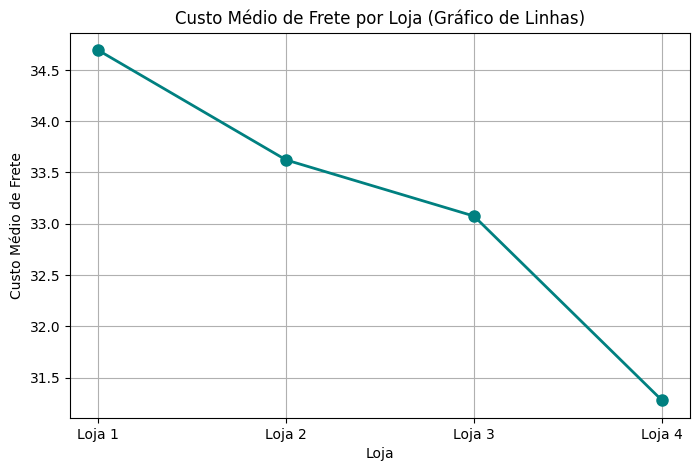

In [33]:
# Criando o gráfico de linhas
plt.figure(figsize=(8, 5))
plt.plot(lojas, media_frete, marker='o', color='teal', linestyle='-', linewidth=2, markersize=8)
plt.title('Custo Médio de Frete por Loja (Gráfico de Linhas)')
plt.xlabel('Loja')
plt.ylabel('Custo Médio de Frete')
plt.grid(True)  # Adiciona uma grade no gráfico para melhor visualização
plt.show()

# Relatório Final – Análise Comparativa das Lojas

O objetivo desta análise é fornecer uma recomendação sobre qual loja o Senhor João deve vender, considerando uma série de fatores essenciais para o desempenho das lojas no mercado. Para isso, foram analisados os dados de faturamento, as categorias de produtos mais e menos vendidas, a média das avaliações dos clientes, os produtos mais e menos vendidos e o custo de frete de cada loja. Através desses dados e das visualizações geradas, é possível identificar qual loja apresenta os melhores indicadores de performance e, portanto, a mais indicada para ser vendida.

# Faturamento
 A análise do faturamento indica que a Loja 4 teve o menor desempenho financeiro, acumulando um total de R$ 1.384.497,58, inferior ao das demais lojas:

Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

A diferença representa uma defasagem competitiva que impacta diretamente na sustentabilidade da loja.

# Vendas por Categoria de Produto

A distribuição de categorias de produtos vendidos na Loja 4 mostra que, embora haja equilíbrio entre categorias como móveis, eletrônicos e brinquedos, a performance é inferior se comparada com as outras lojas. Apesar de ter vendido bem em algumas categorias, como brinquedos e utilidades domésticas, o volume total foi menor, o que reflete uma demanda menos expressiva ou estratégia de vendas menos eficaz.

# Média das Avaliações
A Loja 4 apresenta uma média de avaliação de 3,99, abaixo da média geral entre as lojas. Veja a comparação:

Loja 3: 4,05

Loja 2: 4,03

Loja 1: 3,97

Loja 4: 3,99

Mesmo que a avaliação não seja a mais baixa, ela também não se destaca positivamente, sendo mais uma evidência da performance regular da loja.

# Produtos Mais e Menos Vendidos
A análise dos produtos mais e menos vendidos revela que a Loja 4 tem dificuldades em manter um portfólio de alto giro consistente. Produtos como "Secadora de roupas", "Corda de pular", "Fogão" e "Violão" figuram entre os menos vendidos, o que pode indicar estoque parado e baixa rotatividade.

Já entre os mais vendidos, há uma presença de itens variados, mas não há um padrão claro de sucesso como nas outras lojas, o que evidencia uma falta de foco no mix de produtos.

# Custo Médio de Frete
A Loja 4 apresenta o menor custo médio de frete (R$ 31,28), o que, à primeira vista, poderia ser uma vantagem competitiva. No entanto, esse fator isolado não compensa o baixo faturamento, as vendas irregulares por categoria e os produtos com desempenho mediano.


Com base nas análises realizadas, a Loja 4 se mostra como a unidade menos estratégica e com menor desempenho no portfólio do Senhor João. Seu faturamento é o mais baixo, os produtos não se destacam nas vendas, e sua média de avaliação é apenas mediana. Apesar do custo de frete ser o menor entre as lojas, esse ponto positivo não é suficiente para justificar sua manutenção, considerando os demais indicadores negativos.

Por essas razões, recomenda-se que o Senhor João venda a Loja 4, concentrando esforços nas lojas com melhor desempenho e buscando otimizar ainda mais os resultados das demais unidades.